<a href="https://colab.research.google.com/github/Asterlok/special_algorithms/blob/main/Logic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В датасете `bank.csv` представлены (анонимизированные) данные банка, в которых указаны характеристики клиента, информация о звонках и решении клиента –
принять предложение банка или нет.

**Задача** : обучить модель и предсказывать согласятся
ли потенциальные клиенты с некоторыми характеристиками на 
предложение банка.

Mounted at gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted libs

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [3]:
ds = pd.read_csv("/content/gdrive/MyDrive/dataset/bank.csv", sep=";")

Данные представляют собой значение признаков и результирующее значение – **y**, *да или нет*. 
Я разделяю данные на 2 датасета: признаки и результат.

In [6]:
bank_features = ds.drop('y', axis = 1)
bank_output = ds.y

Использую pandas для массового 
преобразования значения признаков в числовой набор.
Результирующий столбец вручную.

`pandas.get_dummies` -- Convert categorical variable into dummy/indicator variables.

In [12]:
bank_features = pd.get_dummies(bank_features)
# Результат также переводим в число
bank_output = bank_output.replace({
 'no': 0,
 'yes': 1 })

In [14]:
# Разбиваем датасет на части - 75% для обучения, 25% - для проверки
X_train, X_test, y_train, y_test =  train_test_split(bank_features, bank_output, test_size=0.25, random_state=42)

`sklearn.linear_model.LogisticRegression`

`solver`
Algorithm to use in the optimization problem. Default is ‘lbfgs’. 

`C` - float, default=1.0
Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

For small datasets, `‘liblinear’` is a good choice;
`liblinear’` is limited to one-versus-rest schemes.

In [15]:
# Создаем модель
bank_model = LogisticRegression(C = 1e6, solver='liblinear')
bank_model.fit(X_train, y_train)

LogisticRegression(C=1000000.0, solver='liblinear')

– только 10 часть клиентов согласилась

In [16]:
# Рассчитываем полученную точность
accuracy_score = bank_model.score(X_train, y_train)
print(accuracy_score)

0.9085545722713865


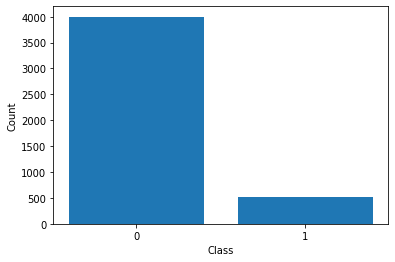

In [19]:
# Демонстрация проблем с данными - данные не равномерные, что приводит к невысокой точности
plt.bar([0, 1], [len(bank_output[bank_output == 0]), len(bank_output[bank_output == 
1])])
plt.xticks([0, 1])
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [20]:
# Выводим относительное количество успешной продажи предложения банка
print('Positive cases: {:.3f}% of all'.format(bank_output.sum() / len(bank_output) * 100))

Positive cases: 11.524% of all


Проверка модели на тех самых 25%:

In [21]:
# На тестовой части проводим прогнозирование
predictions = bank_model.predict(X_test)
# Сверяем прогнозы с данными и выводим отчет
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1006
           1       0.57      0.30      0.40       125

    accuracy                           0.90      1131
   macro avg       0.74      0.64      0.67      1131
weighted avg       0.88      0.90      0.88      1131

